In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('../data/data.csv')

In [37]:
df.head(5)

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.3,3.2,35.1,2/15/2021,4/30/2021,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.6,2.4,26.8,2/1/2021,4/14/2021,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.2,2.4,26.4,1/11/2021,4/16/2021,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.5,2.4,26.7,1/1/2021,5/4/2021,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.8,2.5,27.6,1/4/2021,4/15/2021,2021


In [38]:
df.dtypes

State               object
Num_of_Taps          int64
Yield_per_Tap      float64
Production          object
Avg_Price          float64
Value               object
Retail_Price       float64
Wholesale_Price     object
Bulk_P_Price        object
Bulk_G_Price        object
Date_Open           object
Date_Closed         object
Year                 int64
dtype: object

In [39]:
#remove , from strings
df = df.replace(',','', regex=True)

In [ ]:
df['Value'] = df['Value'].astype('int')
df['Value_per_Tap'] = df['Value']/df['Num_of_Taps']

In [67]:
df.describe()

,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Year,Value_per_Tap
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,993.081818,0.224750,257.309091,40.539091,8827.763636,42.351818,2010.377273,9.058693
std,1188.199694,0.061349,380.714295,11.734254,11698.718741,9.115782,6.200488,3.380246
min,51.000000,0.083000,6.000000,14.200000,290.000000,27.600000,2000.000000,2.699074
25%,353.750000,0.173750,60.000000,32.275000,2195.250000,34.375000,2005.000000,6.601089
50%,470.000000,0.223500,115.000000,38.450000,4795.000000,41.700000,2010.500000,8.542982
75%,1415.500000,0.264500,265.000000,46.900000,8789.250000,47.775000,2016.000000,11.022789
max,6500.000000,0.410000,2070.000000,87.200000,59700.000000,68.000000,2021.000000,19.494118


In [40]:
import matplotlib.pyplot as plt

In [41]:
df.groupby('State')[['Retail_Price']].mean().sort_values('Retail_Price',ascending=False)

,Retail_Price
State,
Minnesota,54.166667
Connecticut,51.263158
West Virginia,47.333333
New Hampshire,46.986364
Maine,46.904545
Massachusetts,44.973684
Michigan,41.009091
Indiana,40.566667
Vermont,40.554545


In [42]:
df.groupby('State')[['Yield_per_Tap']].mean().sort_values('Yield_per_Tap',ascending=False)

,Yield_per_Tap
State,
Vermont,0.274818
Maine,0.251227
Wisconsin,0.244227
New Hampshire,0.228455
Ohio,0.226789
Michigan,0.226045
New York,0.220545
Indiana,0.219000
Massachusetts,0.200789


In [44]:
df.groupby('State')[['Value_per_Tap']].mean().sort_values('Value_per_Tap',ascending=False)

,Value_per_Tap
State,
Minnesota,12.688965
Connecticut,11.973965
New Hampshire,11.554933
Indiana,10.985714
Massachusetts,10.027047
Michigan,9.801318
Vermont,8.554750
Ohio,8.548439
Wisconsin,8.215903


In [59]:
df['Production'] = df['Production'].astype('int')

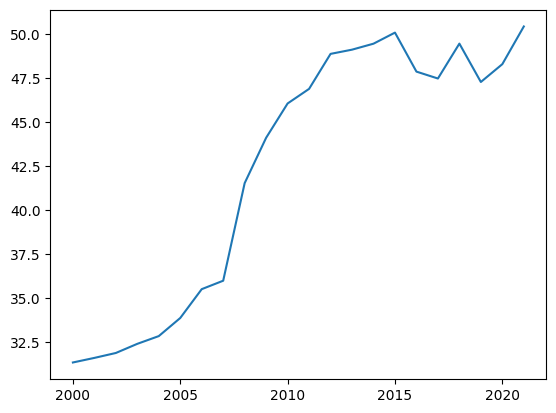

In [63]:
#Average retail price by year
plt.plot(df.groupby('Year')['Retail_Price'].mean())

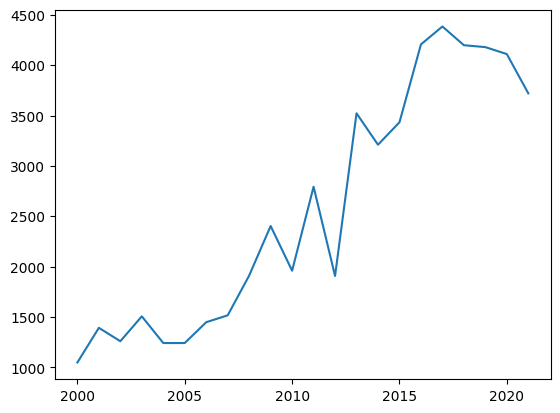

In [64]:
#Total Production by year
plt.plot(df.groupby('Year')['Production'].sum())

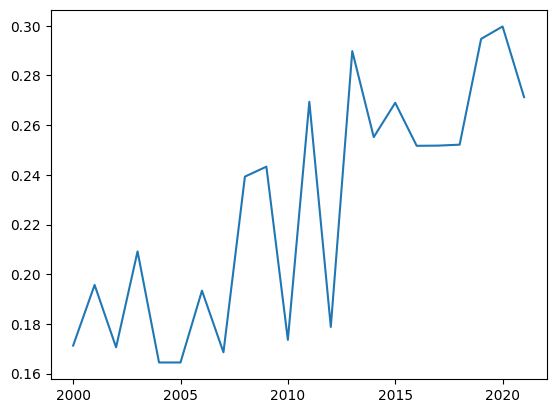

In [68]:
#Yield per tap average
plt.plot(df.groupby('Year')['Yield_per_Tap'].mean())


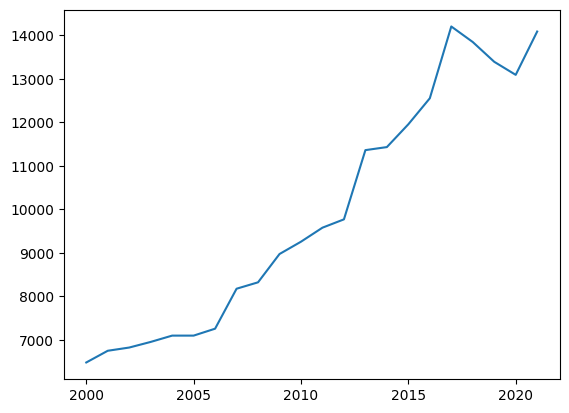

In [70]:
#Num of Taps
plt.plot(df.groupby('Year')['Num_of_Taps'].sum())

In [ ]:
df = df.set_index('Year')
#group data by product and display sales as line chart
df.groupby('State')['Production'].plot(legend=True)